In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17966, 9)

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


EDA

In [6]:
df.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


<Axes: >

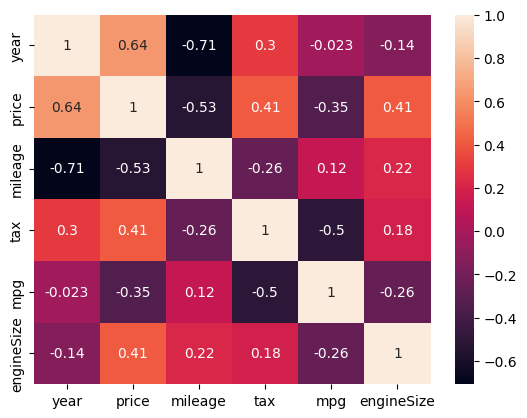

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

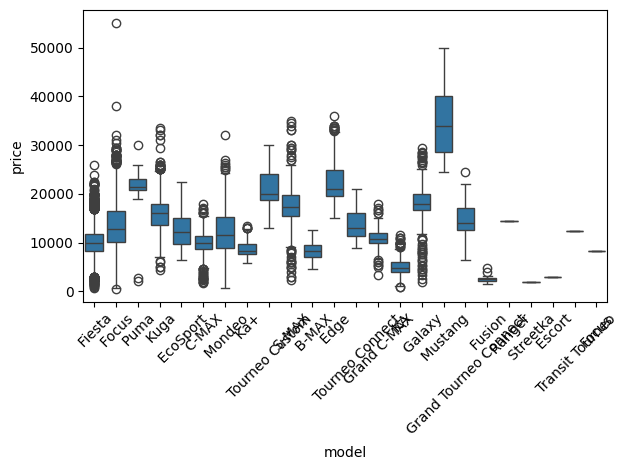

In [8]:
sns.boxplot(data=df, x='model', y='price')
plt.xticks(rotation=45)  # Rotates x-axis labels by 45 degrees
plt.tight_layout()       # Adjusts layout to prevent label cutoff

<Axes: xlabel='fuelType', ylabel='price'>

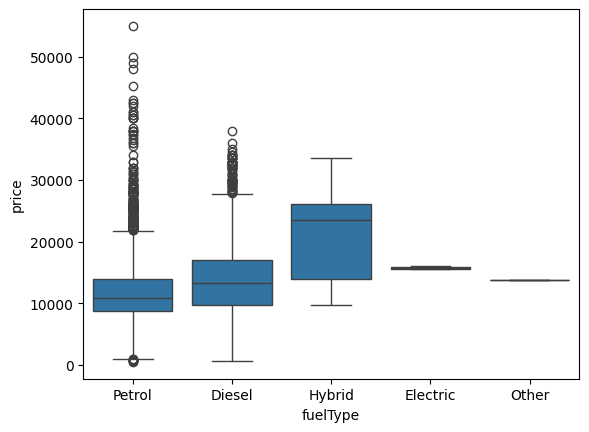

In [9]:
sns.boxplot(data=df, x='fuelType', y='price')

In [10]:
#one hot encoding(create new table)
df_encoded=pd.get_dummies(df)

In [11]:
df_encoded

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17962,2014,7499,40700,30,57.7,1.0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17963,2015,9999,7010,20,67.3,1.6,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
17964,2018,8299,5007,145,57.7,1.2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [12]:
df_encoded=df_encoded.astype(int)

In [13]:
df_encoded 

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,7499,40700,30,57,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,9999,7010,20,67,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,8299,5007,145,57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
columns=['model','transmission','fuelType']
x_label=df
for i in columns:
    x_label[i]=encode.fit_transform(x_label[i])
x_label

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


In [15]:
df['transmission'].value_counts()

transmission
1    15518
0     1361
2     1087
Name: count, dtype: int64

In [16]:
#standareization of label encoding
x_label.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
#cols=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
 #      'mpg', 'engineSize']
#x_label[cols]=scaler.fit_transform(x_label[cols])
#x_label

NameError: name 'scaler' is not defined

model training

In [18]:
x1=df_encoded.drop(columns=['price'])
x1

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,40700,30,57,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [19]:
y=df_encoded['price']

In [20]:
#standardization for one hot encoding
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['year','mileage','tax','mpg','engineSize']
x1[num_cols]=scaler.fit_transform(x1[num_cols])
x1

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split( x1, y, test_size=0.20, random_state=42)

In [23]:
model1=LinearRegression()
model1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_predict=model1.predict(X_test)
y_predict

array([ 6866.3580764 ,  9347.6810129 ,  9362.18320785, ...,
       31454.95287518,  9781.20362786, 15253.49970894])

In [25]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

In [26]:
r2=r2_score(y_test,y_predict)
r2

0.8464177711972801

In [36]:
import joblib
joblib.dump(model1,"model_car.pkl")
joblib.dump(scaler,"scaler_car.pkl")
joblib.dump(x1.columns.tolist(),"columns_car.pkl")

['columns_car.pkl']

In [37]:
x1.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ B-MAX',
       'model_ C-MAX', 'model_ EcoSport', 'model_ Edge', 'model_ Escort',
       'model_ Fiesta', 'model_ Focus', 'model_ Fusion', 'model_ Galaxy',
       'model_ Grand C-MAX', 'model_ Grand Tourneo Connect', 'model_ KA',
       'model_ Ka+', 'model_ Kuga', 'model_ Mondeo', 'model_ Mustang',
       'model_ Puma', 'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')